<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/face_stylization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [2]:
!wget -O face_stylizer.task -q https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_sketch.task

In [3]:
!wget -O color_ink.task -q https://storage.googleapis.com/mediapipe-models/face_stylizer/blaze_face_stylizer/float32/latest/face_stylizer_color_ink.task

In [4]:
!wget -O woman.png -q https://storage.googleapis.com/mediapipe-assets/business-person.png

In [5]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import mediapipe as mp

from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [16]:
base_options = python.BaseOptions(model_asset_path='/content/face_stylizer.task')
options = vision.FaceStylizerOptions(base_options=base_options)

In [19]:
with vision.FaceStylizer.create_from_options(options) as stylizer:
  image = mp.Image.create_from_file("/content/woman.png")
  stylized_image = stylizer.stylize(image)

In [12]:
dir(stylized_image)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'channels',
 'create_from_file',
 'height',
 'image_format',
 'is_aligned',
 'is_contiguous',
 'is_empty',
 'numpy_view',
 'step',
 'uses_gpu',
 'width']

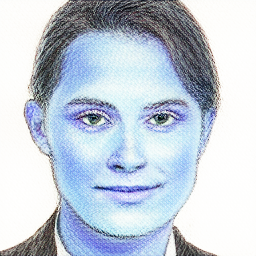

In [20]:
cv2_imshow(stylized_image.numpy_view())